In [139]:
#Articulate all pandas and modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import sys
import scipy.stats as stats
from numpy import mean, median
from scipy.stats import mode
from collections import Counter
from random import shuffle
plt.style.use('fivethirtyeight')
%matplotlib inline


In [140]:
#Read in Billboard csv raw file
bb = pd.read_csv('/Users/DES/DSI-NYC-5/labs/data-cleaning-billboard/assets/datasets/billboard.csv')


In [141]:
bb.head()


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,*,*,*,*,*,*,*,*,*,*
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23,18,...,*,*,*,*,*,*,*,*,*,*
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47,45,...,*,*,*,*,*,*,*,*,*,*


In [142]:
bb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        317 non-null object
x1st.week          317 non-null int64
x2nd.week          317 non-null object
x3rd.week          317 non-null object
x4th.week          317 non-null object
x5th.week          317 non-null object
x6th.week          317 non-null object
x7th.week          317 non-null object
x8th.week          317 non-null object
x9th.week          317 non-null object
x10th.week         317 non-null object
x11th.week         317 non-null object
x12th.week         317 non-null object
x13th.week         317 non-null object
x14th.week         317 non-null object
x15th.week         317 non-null object
x16th.week         317 non-null object


In [143]:
bb.get_dtype_counts()


int64      2
object    81
dtype: int64

In [144]:
#Replace column names containing periods with underscore
bb.columns = [x.replace('.', '_') if '.' in x else x \
              for x in bb.columns]


In [145]:
bb.columns


Index([u'year', u'artist_inverted', u'track', u'time', u'genre',
       u'date_entered', u'date_peaked', u'x1st_week', u'x2nd_week',
       u'x3rd_week', u'x4th_week', u'x5th_week', u'x6th_week', u'x7th_week',
       u'x8th_week', u'x9th_week', u'x10th_week', u'x11th_week', u'x12th_week',
       u'x13th_week', u'x14th_week', u'x15th_week', u'x16th_week',
       u'x17th_week', u'x18th_week', u'x19th_week', u'x20th_week',
       u'x21st_week', u'x22nd_week', u'x23rd_week', u'x24th_week',
       u'x25th_week', u'x26th_week', u'x27th_week', u'x28th_week',
       u'x29th_week', u'x30th_week', u'x31st_week', u'x32nd_week',
       u'x33rd_week', u'x34th_week', u'x35th_week', u'x36th_week',
       u'x37th_week', u'x38th_week', u'x39th_week', u'x40th_week',
       u'x41st_week', u'x42nd_week', u'x43rd_week', u'x44th_week',
       u'x45th_week', u'x46th_week', u'x47th_week', u'x48th_week',
       u'x49th_week', u'x50th_week', u'x51st_week', u'x52nd_week',
       u'x53rd_week', u'x54th_week', u'x

In [146]:
#Clean up weekly ranking fields by replacing Missing Data value '*' to 0
def replace_nulls(value):
    if value == '*':
        return int(0)
    else:
        return value  


In [147]:
bb = bb.applymap(replace_nulls)


In [148]:
#Convert weeks variables to int
bb.iloc[:,7:] = np.array(bb.iloc[:,7:]).astype(int)


In [149]:
#Data munging time feature
bb['time'].unique()


array(['3,38,00 AM', '4,18,00 AM', '4,07,00 AM', '3,45,00 AM',
       '4,17,00 AM', '4,31,00 AM', '3,36,00 AM', '3,52,00 AM',
       '4,25,00 AM', '3,10,00 AM', '3,18,00 AM', '4,01,00 AM',
       '4,03,00 AM', '4,12,00 AM', '4,14,00 AM', '4,04,00 AM',
       '3,50,00 AM', '3,43,00 AM', '4,21,00 AM', '3,24,00 AM',
       '3,48,00 AM', '3,53,00 AM', '4,05,00 AM', '4,00,00 AM',
       '4,16,00 AM', '4,57,00 AM', '4,34,00 AM', '3,15,00 AM',
       '4,42,00 AM', '4,06,00 AM', '3,19,00 AM', '3,46,00 AM',
       '3,51,00 AM', '4,23,00 AM', '3,56,00 AM', '3,54,00 AM',
       '3,09,00 AM', '2,52,00 AM', '3,29,00 AM', '5,03,00 AM',
       '3,23,00 AM', '5,16,00 AM', '7,50,00 AM', '3,30,00 AM',
       '3,49,00 AM', '4,30,00 AM', '3,42,00 AM', '3,04,00 AM',
       '4,02,00 AM', '4,46,00 AM', '3,35,00 AM', '3,57,00 AM',
       '4,13,00 AM', '3,55,00 AM', '5,27,00 AM', '4,19,00 AM',
       '4,08,00 AM', '3,22,00 AM', '3,32,00 AM', '3,41,00 AM',
       '3,25,00 AM', '3,08,00 AM', '3,03,00 AM', '3,37,

In [150]:
#Clean up time variable
bb['time'] = bb['time'].apply(lambda x: x.strip(' AM'))
bb['time'] = bb['time'].apply(lambda x: x.replace(",",":"))
bb['time'] = pd.to_datetime(bb['time'], errors='ignore')
bb['time'] = pd.Series([val.time() for val in bb['time']])


In [151]:
bb['time'][0:10]


0    03:38:00
1    04:18:00
2    04:07:00
3    03:45:00
4    03:38:00
5    04:17:00
6    04:31:00
7    03:36:00
8    03:52:00
9    04:25:00
Name: time, dtype: object

In [152]:
#Date fields data clean up: date_entered, date peaked
bb['date_entered'] = pd.to_datetime(bb['date_entered'], errors='ignore')
bb['date_peaked'] = pd.to_datetime(bb['date_peaked'], errors='ignore')


In [153]:
#Data validation to ensure date track entered does not surpass the date track peaked
bb['date_diff']  = bb['date_peaked'] - bb['date_entered']
bb['date_diff'] = bb['date_diff'].apply(lambda x: x.days)


In [154]:
bb.describe()


,year,x1st_week,x2nd_week,x3rd_week,x4th_week,x5th_week,x6th_week,x7th_week,x8th_week,x9th_week,...,x68th_week,x69th_week,x70th_week,x71st_week,x72nd_week,x73rd_week,x74th_week,x75th_week,x76th_week,date_diff
count,317.0,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,...,317.0,317.0,317.0,317.0,317.0,317.0,317.0,317.0,317.0,317.000000
mean,2000.0,79.958991,70.050473,62.993691,56.558360,51.895899,46.249211,41.766562,38.646688,36.987382,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.246057
std,0.0,14.686865,20.122189,23.381535,25.562047,27.423747,28.501905,29.503096,29.974168,30.568141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.867601
min,2000.0,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,2000.0,74.000000,62.000000,52.000000,41.000000,34.000000,24.000000,17.000000,10.000000,8.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.000000
50%,2000.0,81.000000,73.000000,66.000000,60.000000,55.000000,47.000000,41.000000,36.000000,34.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.000000
75%,2000.0,91.000000,83.000000,79.000000,74.000000,71.000000,68.000000,62.000000,60.000000,60.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.000000
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.000000


In [155]:
bb.get_dtype_counts()


datetime64[ns]     2
int64             78
object             4
dtype: int64

In [156]:
#Feature Engineering: Create Counter function to be used for "Was Ever Number One on the Billboard Top 100"
def CounterFunc(x):
    return Counter(x)[1]


In [157]:
bb['Counter'] = bb.count(axis=1)
bb['Counter'] = bb.apply(CounterFunc, axis=1)


In [158]:
bb['Counter']

0      11
1      10
2       4
3       4
4       4
5       3
6       3
7       3
8       2
9       2
10      2
11      2
12      1
13      1
14      1
15      1
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
287     0
288     0
289     0
290     0
291     0
292     0
293     0
294     0
295     0
296     0
297     0
298     0
299     0
300     0
301     0
302     0
303     0
304     0
305     0
306     0
307     0
308     0
309     0
310     0
311     0
312     0
313     0
314     0
315     0
316     0
Name: Counter, dtype: int64

In [159]:
#Create Feature: Was Ever Number One Flag
bb['WasEverNumber1'] = bb['Counter'].apply(lambda x: 1 if x > 0 else 0)


In [160]:
bb[(bb['WasEverNumber1']==1)]


,year,artist_inverted,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x70th_week,x71st_week,x72nd_week,x73rd_week,x74th_week,x75th_week,x76th_week,date_diff,Counter,WasEverNumber1
0,2000,Destiny's Child,Independent Women Part I,03:38:00,Rock,2000-09-23,2000-11-18,78,63,49,...,0,0,0,0,0,0,0,56,11,1
1,2000,Santana,"Maria, Maria",04:18:00,Rock,2000-02-12,2000-04-08,15,8,6,...,0,0,0,0,0,0,0,56,10,1
2,2000,Savage Garden,I Knew I Loved You,04:07:00,Rock,1999-10-23,2000-01-29,71,48,43,...,0,0,0,0,0,0,0,98,4,1
3,2000,Madonna,Music,03:45:00,Rock,2000-08-12,2000-09-16,41,23,18,...,0,0,0,0,0,0,0,35,4,1
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),03:38:00,Rock,2000-08-05,2000-10-14,57,47,45,...,0,0,0,0,0,0,0,70,4,1
5,2000,Janet,Doesn't Really Matter,04:17:00,Rock,2000-06-17,2000-08-26,59,52,43,...,0,0,0,0,0,0,0,70,3,1
6,2000,Destiny's Child,Say My Name,04:31:00,Rock'n'roll,1999-12-25,2000-03-18,83,83,44,...,0,0,0,0,0,0,0,84,3,1
7,2000,"Iglesias, Enrique",Be With You,03:36:00,Latin,2000-04-01,2000-06-24,63,45,34,...,0,0,0,0,0,0,0,84,3,1
8,2000,Sisqo,Incomplete,03:52:00,Rock'n'roll,2000-06-24,2000-08-12,77,66,61,...,0,0,0,0,0,0,0,49,2,1
9,2000,Lonestar,Amazed,04:25:00,Country,1999-06-05,2000-03-04,81,54,44,...,0,0,0,0,0,0,0,273,2,1


In [161]:
print pd.value_counts(bb.WasEverNumber1)


0    300
1     17
Name: WasEverNumber1, dtype: int64


In [162]:
print 'Dataframe shape: {}'.format(bb.shape)
print 'Artist null values, shape: {}.'.format(bb[bb.artist_inverted.isnull() == True].shape)


Dataframe shape: (317, 86)
Artist null values, shape: (0, 86).


In [163]:
bb_df1 = bb[(bb['WasEverNumber1']==1)]


In [164]:
def summary_stats(col, data):
    print 'COLUMN: ' + col
    print 'mean: ' + str(np.mean(data))
    print 'median: ' + str(np.median(data))
    print 'mode: ' + str(stats.mode([round(d) for d in data]))
    print 'variance: ' + str(np.var(data))
    print 'standard deviation: ' + str(np.std(data))
 

In [165]:
summary_stats('date_diff',bb_df1['date_diff'])


COLUMN: date_diff
mean: 94.7058823529
median: 84.0
mode: ModeResult(mode=array([ 84.]), count=array([4]))
variance: 3465.26643599
standard deviation: 58.8665137067


In [166]:
summary_stats('date_diff',bb['date_diff'])


COLUMN: date_diff
mean: 52.2460567823
median: 49.0
mode: ModeResult(mode=array([ 49.]), count=array([30]))
variance: 1664.89213745
standard deviation: 40.8030898027


In [167]:
#Pre-work for p-value calculation
a_mean = bb_df1['date_diff'].mean()
b_mean = bb['date_diff'].mean()

a_var = bb_df1['date_diff'].var()
b_var = bb['date_diff'].var()

a_n = len(bb_df1['date_diff'])
b_n = len(bb['date_diff'])


In [168]:
numerator = a_mean - b_mean
denominator = np.sqrt((a_var / a_n) + (b_var / b_n))
z = numerator / denominator
z


2.8506942797193311

In [169]:
numerator

42.45982557060679

In [170]:
#P value calcultation
p_val = 1 - stats.norm.cdf(z)
p_val


0.0021811945504529584

In [172]:
#Account for two-tail test
ttest = p_val*2
ttest


0.0043623891009059168

In [178]:
#Reject the Null Hypothesis if pval>alpha
#where Null hypothesis is: there is no difference between how quickly songs that have been #1 vs not
alpha = .05 
print "P-value :", p_val
print "Alpha/Significance Level :", alpha
print "Two-tail T-test :", ttest 
print "Is P-value greater than Alpha :", p_val > alpha
print "Is T-test greater than Alpha  :", ttest > alpha


P-value : 0.00218119455045
Alpha/Significance Level : 0.05
Two-tail T-test : 0.00436238910091
Is P-value greater than Alpha : False
Is T-test greater than Alpha  : False


In [135]:
#Running p-values using SciPy
sample = stats.ttest_1samp(bb['date_diff'], a_mean)
print sample


Ttest_1sampResult(statistic=-18.497782589362931, pvalue=2.7919259963367733e-52)


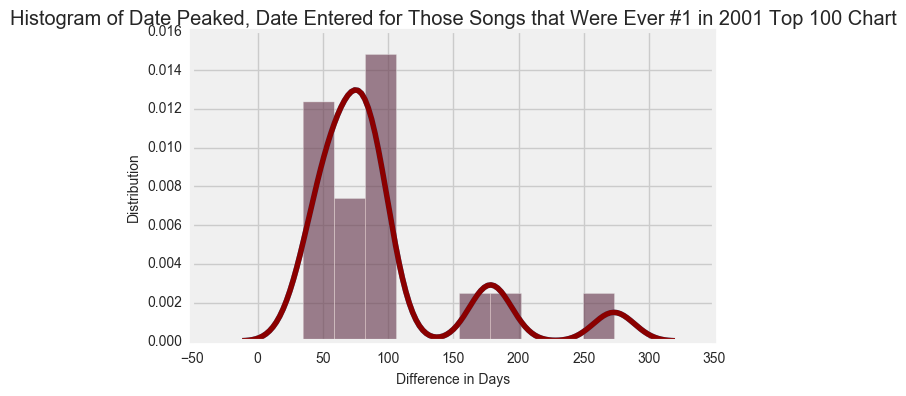

In [137]:
#Histogram for Songs that became chart toppers in days
ax = sns.distplot(bb_df1['date_diff'], bins=10)
sns.distplot(bb_df1['date_diff'], color='darkred', bins=10, ax=ax)

ax = plt.axes()
ax.set_title('Histogram of Date Peaked, Date Entered for Those Songs that Were Ever #1 in 2001 Top 100 Chart')

plt.xlabel('Difference in Days', fontsize=10)
plt.ylabel('Distribution', fontsize=10)

plt.show()


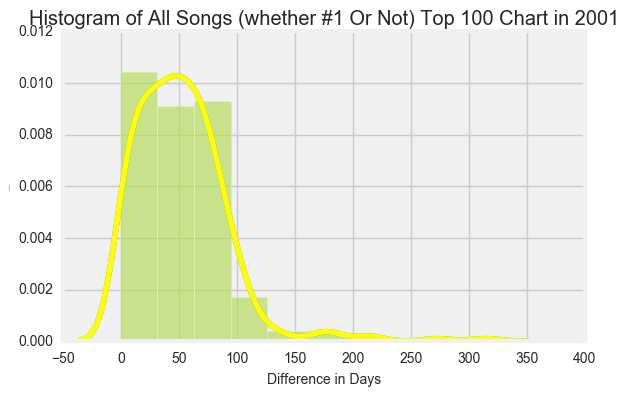

In [138]:
ax = sns.distplot(bb['date_diff'], bins=10)
sns.distplot(bb['date_diff'], color='yellow', bins=10, ax=ax)

ax = plt.axes()
ax.set_title('Histogram of All Songs (whether #1 Or Not) Top 100 Chart in 2001')
plt.xlabel('Difference in Days', fontsize=10)
plt.ylabel('Distribution', fontsize=1)
plt.show()


In [124]:
#Convert date difference for Was Ever Number Song and those Not Ever Number One to list
#Lists to be used in shuffling technique below
list_1 = bb_df1['date_diff'].tolist()
list_0 = bb['date_diff'].tolist()
print np.mean(list_1) - np.mean(list_0)
list_nums = list_1 + list_0


42.4598255706


In [126]:
#Run a reshuffling simulation of 10,000 where reshuffling the difference between date song peaked
#Versus date song entered
m = 0 
for i in range(10000):
    shuffle(list_nums)
    difference = sum(list_nums[:17])/len(list_nums[:17]) - sum(list_nums[17:])/len(list_nums[17:])
    if (difference >= 42.460):
        m+=1
p = m / 10000.0
print p


0.0003
